In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
data =pd.read_csv("kc_house_data.csv")
houses=data.copy()
houses.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [2]:
print(houses.info(),houses.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB
None               

In [3]:
data.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


<function matplotlib.pyplot.show(*args, **kw)>

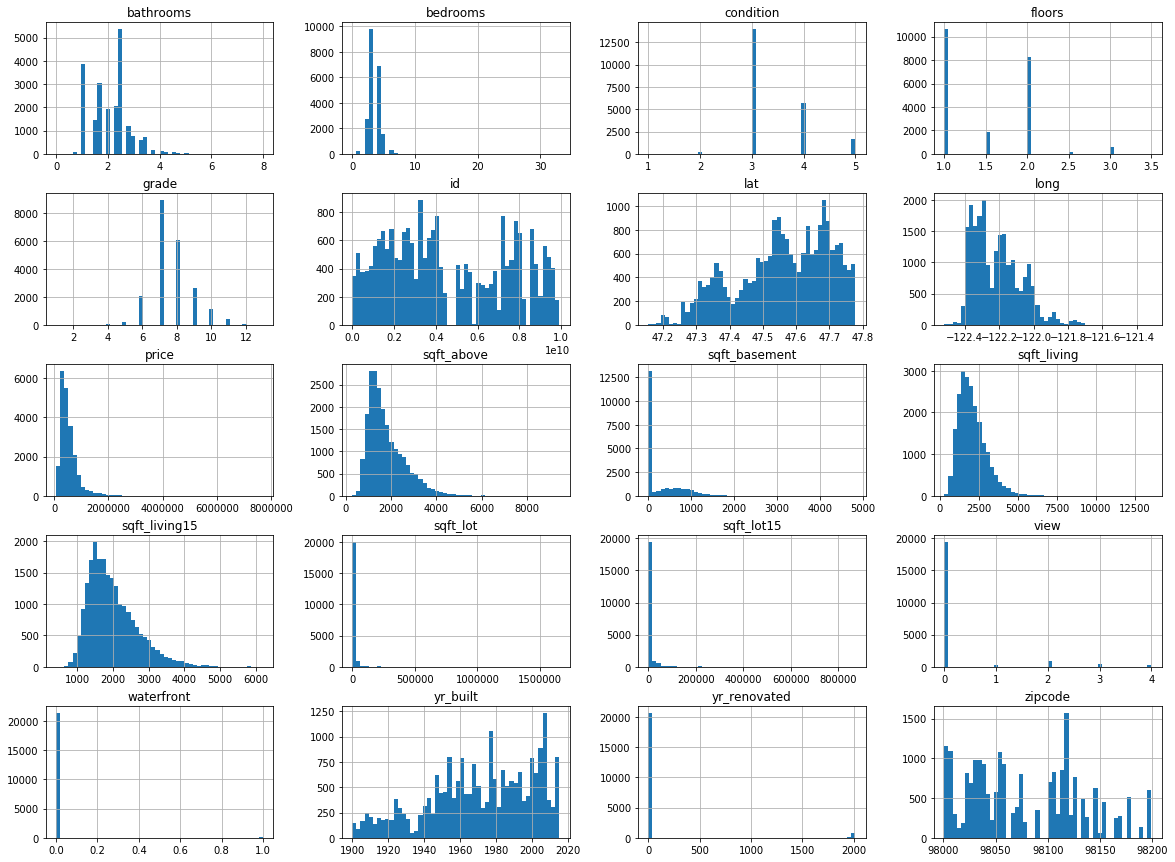

In [4]:
data.hist(bins=50, figsize=(20,15))
plt.show

In [5]:
houses= houses.drop(['id','date','zipcode','lat','long','sqft_basement','yr_renovated','condition','yr_built','sqft_lot'],axis=1)
houses.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,1.0,0,0,7,1180,1340,5650
1,538000.0,3,2.25,2570,2.0,0,0,7,2170,1690,7639
2,180000.0,2,1.00,770,1.0,0,0,6,770,2720,8062
3,604000.0,4,3.00,1960,1.0,0,0,7,1050,1360,5000
4,510000.0,3,2.00,1680,1.0,0,0,8,1680,1800,7503


In [6]:
for i in range(1,len(houses.axes[1])):
    c=houses.iloc[:,i]
    c=(c-min(c))/(max(c)-min(c))
    houses.iloc[:,i]=c
houses

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_living15,sqft_lot15
0,221900.0,0.090909,0.12500,0.067170,0.0,0.0,0.0,0.500000,0.097588,0.161934,0.005742
1,538000.0,0.090909,0.28125,0.172075,0.4,0.0,0.0,0.500000,0.206140,0.222165,0.008027
2,180000.0,0.060606,0.12500,0.036226,0.0,0.0,0.0,0.416667,0.052632,0.399415,0.008513
3,604000.0,0.121212,0.37500,0.126038,0.0,0.0,0.0,0.500000,0.083333,0.165376,0.004996
4,510000.0,0.090909,0.25000,0.104906,0.0,0.0,0.0,0.583333,0.152412,0.241094,0.007871
...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,0.090909,0.31250,0.093585,0.8,0.0,0.0,0.583333,0.135965,0.194631,0.000986
21609,400000.0,0.121212,0.31250,0.152453,0.4,0.0,0.0,0.583333,0.221491,0.246257,0.007523
21610,402101.0,0.060606,0.09375,0.055094,0.4,0.0,0.0,0.500000,0.080044,0.106866,0.001558
21611,400000.0,0.090909,0.31250,0.098868,0.4,0.0,0.0,0.583333,0.143640,0.173980,0.000731


In [7]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]
train,test=split_train_test(houses,0.2)
y_train=train['price']
x_train=train.drop(['price'],axis=1)
y_test= test['price']
x_test=test.drop(['price'],axis=1)
x_train

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_living15,sqft_lot15
4687,0.060606,0.12500,0.046038,0.0,0.0,0.0,0.416667,0.066886,0.177422,0.004421
983,0.060606,0.12500,0.048302,0.0,0.0,0.0,0.500000,0.070175,0.112029,0.005455
15604,0.090909,0.43750,0.206792,0.4,0.0,0.5,0.583333,0.300439,0.334022,0.011382
11520,0.121212,0.21875,0.141132,0.4,0.0,0.0,0.583333,0.205044,0.273791,0.010445
809,0.090909,0.25000,0.125283,0.0,0.0,0.0,0.583333,0.182018,0.332301,0.007537
...,...,...,...,...,...,...,...,...,...,...
17302,0.060606,0.12500,0.052830,0.0,0.0,0.0,0.500000,0.076754,0.199793,0.003847
6574,0.121212,0.31250,0.136604,0.4,0.0,0.0,0.583333,0.198465,0.292721,0.006365
17621,0.060606,0.12500,0.079245,0.0,0.0,0.0,0.500000,0.115132,0.180864,0.007323
12892,0.060606,0.12500,0.058868,0.0,0.0,0.0,0.416667,0.085526,0.125796,0.006282


In [8]:
y_train

4687     205000.0
983      379000.0
15604    700000.0
11520    475000.0
809      361000.0
           ...   
17302    747000.0
6574     303000.0
17621    450000.0
12892    209000.0
10904    110700.0
Name: price, Length: 17291, dtype: float64

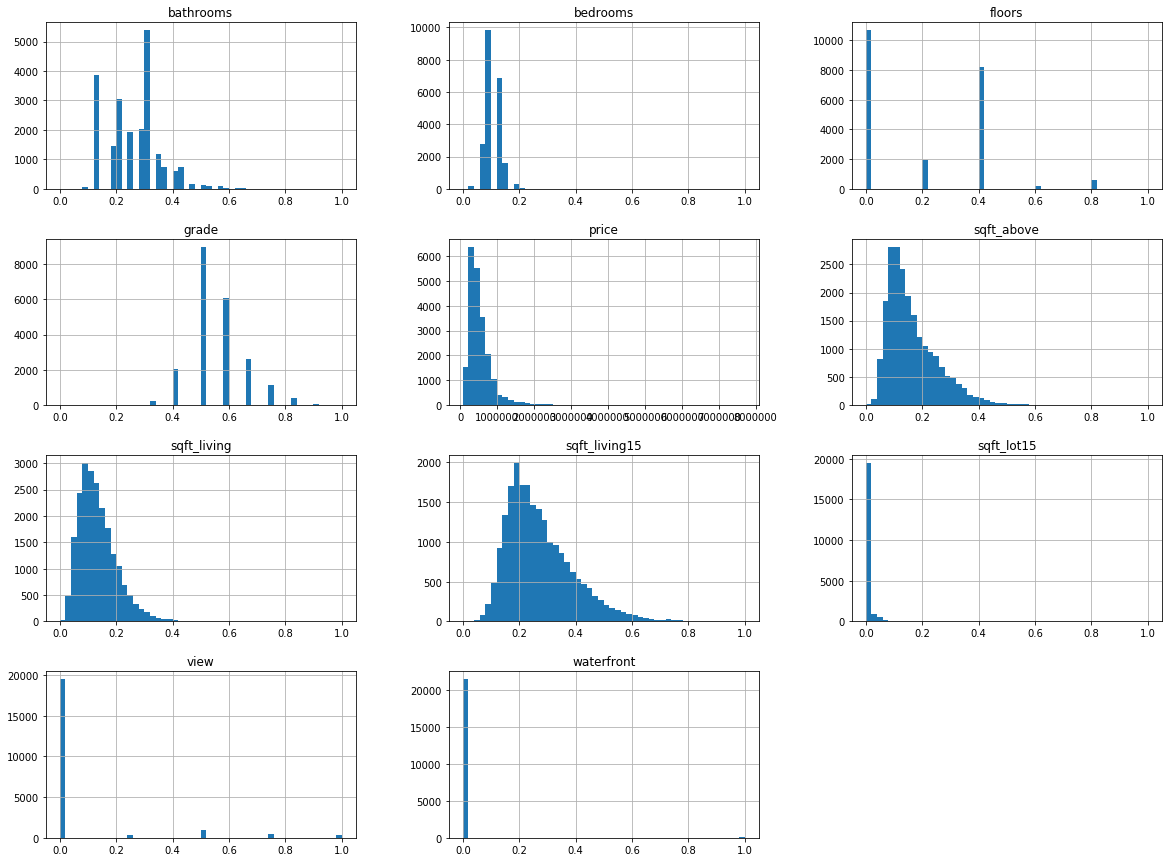

In [9]:
houses.hist(bins=50, figsize=(20,15))
plt.show()

In [10]:
houses.corr()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.256794,0.266369,0.397293,0.667434,0.605567,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.175429,-0.006582,0.079532,0.356967,0.477600,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.500653,0.063744,0.187737,0.664983,0.685342,0.568634,0.087175
sqft_living,0.702035,0.576671,0.754665,1.000000,0.353949,0.103818,0.284611,0.762704,0.876597,0.756420,0.183286
floors,0.256794,0.175429,0.500653,0.353949,1.000000,0.023698,0.029444,0.458183,0.523885,0.279885,-0.011269
waterfront,0.266369,-0.006582,0.063744,0.103818,0.023698,1.000000,0.401857,0.082775,0.072075,0.086463,0.030703
view,0.397293,0.079532,0.187737,0.284611,0.029444,0.401857,1.000000,0.251321,0.167649,0.280439,0.072575
grade,0.667434,0.356967,0.664983,0.762704,0.458183,0.082775,0.251321,1.000000,0.755923,0.713202,0.119248
sqft_above,0.605567,0.477600,0.685342,0.876597,0.523885,0.072075,0.167649,0.755923,1.000000,0.731870,0.194050
sqft_living15,0.585379,0.391638,0.568634,0.756420,0.279885,0.086463,0.280439,0.713202,0.731870,1.000000,0.183192


In [11]:
x_train_b = np.c_[np.ones((17291 , 1)), x_train]
#normal equation

theta_best = np.linalg.inv(x_train_b.T.dot(x_train_b)).dot((x_train_b.T).dot(y_train.T))# 2*1000.1000*1=2*1,11*2.2*1
print(theta_best)# 11*100
print(np.shape(x_train_b))

[-344831.37087378 -979289.4805429  -167705.00966106 2962263.15031832
  -26944.12862393  549939.61601812  233746.04639232 1193913.06520771
 -416296.74984839  111287.37662832 -625188.38478176]
(17291, 11)


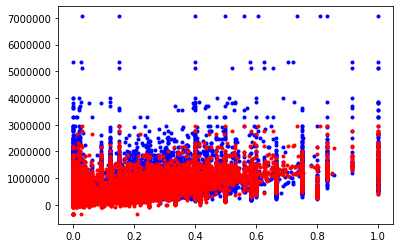

In [12]:
x_test_b=np.c_[np.ones((4322 ,1)),x_test]
y_predict = x_test_b.dot(theta_best)
plt.plot(x_test,y_test,'.b')
plt.plot(x_test,y_predict,'.r')
plt.show()

In [17]:
def Mean_abs_Error(x,theta,iterations,y):
    z=0
    y=np.array(y)
    for i in range(iterations):
        z+= abs((np.dot(x[i,:],theta) - y[i]))
    z=(z/iterations)
    return print(z)
Mean_abs_Error(x_test_b,theta_best,len(x_test),y_test)

157776.75965639006


In [18]:
y_test.mean()#it's the (error value 0.0009851808420545845)
#it's the mean for my test pridection

547772.2737158723